$$
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear time invariant systems

## Impulse response

The **impulse response**, $h(t)$, of a continuous LTI system is the response of the system when fed an unit impulse $\delta(t)$.
Formally, it is:
$$
h(t) = T[ \delta(t) ]
$$

Now, suppose that we fed the system an arbitrary input $x(t)$, we assert that the output would be:
$$
y(t) = x(t) * h(t)
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        By the replication property:
        $$
        x(t) = x(t) * \delta(t) = \int ^\infty _{-\infty} x(\tau) \delta(t-\tau) d\tau
        $$
        Since the system is time-invariant:
        $$
        h(t-\tau) = T[\delta(t-\tau)]
        $$
        Since the system is linear:
        $$
        \begin{align}
        y(t) &= T[x(t)] \\
        &= T\left[\int ^\infty _{-\infty} x(\tau) \delta(t-\tau) d\tau\right] \\
        &=\int ^\infty _{-\infty}x(\tau)T\left[ \delta(t-\tau) \right]d\tau \\
        &=\int ^\infty _{-\infty}x(\tau)h(t-\tau)d\tau\\
        &= x(t) * h(t)\\
        & QED
        \end{align}
        $$
    </div>
</details>

Hence, to characterize any LTI system, we simply need to find $h(t)$.

## Frequency response (via Fourier transform)

Once again, we can apply the [Fourier transform](./fourier_transform.ipynb) to obtain:

$$
Y(f) = X(f) \cdot H(f)
$$

$H(f)$ is the **frequency response**, and $|H(f)|$ and $\angle H(f)$ are the magnitude response and phase response respectively.

### Sinusoidal response

Suppose that a complex sinusoid with frequency $f_0$ is pass through the system with frequency response of $H(f)$.
It is easy to see that the resultant sinusoid is multiplied by $|H(f_0)|$ and phase shifted by $\angle H(f_0)$.

## Frequency response (via Laplace transform)

### Right-sidedness
We consider causal systems and right-sided input, defined formally as:
$$
h(t) = 0 \quad t < 0\\
x(t) = 0 \quad t < 0\\
$$

Because of this, the output $y(t) = x(t) * h(t)$ is also right sided.

### Laplace transform
The unilateral Laplace transform of a temporal function is defined as:
$$
\tilde V (s) = \mathcal L \{ v(t) \} = \int ^ \infty _{0^-}e^{-st} dt
$$

Since convolution in the time domain correspond to multiplication in the $s$ domain, we obtain:
$$
\tilde Y(s) = \tilde X(s) \tilde H(s)
$$

$\tilde H(s)$ is the **transfer function** of the system.

(If $s = j\omega$ lies on the regions-of-convergence of $\tilde X(s), \tilde Y(s), \tilde H(s)$, then we can substitute $s$ to $j\omega$ to obtain the frequency response once again: $\tilde H(j\omega) = \tilde H(s) | _{s = j\omega}$)

### Steady-state sinusoidal response


Similarly, when a right-sided sinusoidal input is fed in to the system, the resultant sinusoid is multiplied by $|\tilde H(j \omega_0)|$ and phase shifted by $\angle \tilde H(j \omega_0)$.

## LTI systems described by differential equations


Suppose that our system is described by:
$$
\sum ^N _{n=0} a_n \frac{d^n y(t)}{dt^n} = \sum ^M _{m=0} b_m \frac{d^m x(t)}{dt^m}
$$

Again, this may seem like a rather strange system, but this type of system appear rather commonly in real life; _eg_ in electrical circuits with capacitors/inductors and mechanical systems with springs.

Taking the Laplace transform:

$$
\sum ^N _{n=0} a_n s^n \tilde Y(s) = \sum ^M _{m=0} b_m s^m \tilde X(s)
$$

Hence, the transfer function $\tilde H(s) = \frac{\tilde Y(s)}{\tilde X(s)}$ is:

$$
\tilde H(s) = \frac{ \sum ^M _{m=0} b_m s^m }{\sum ^N _{n=0} a_n s^n} 
$$

We can factorize this into:

$$
\tilde H(s) = K'\frac{(s+z_1)(s+z_2)\dots(s+z_M)}{(s+p_1)(s+p_2)\dots(s+p_N)} 
$$

where:
* $K' = \frac{b_0}{a_0} \frac{\Pi p_i}{\Pi z_i}$
* $-z_i$ are the **system zeros**
    * $\tilde H(-z_i) = 0$
* $-p_i$ are the **system poles**
    * $\tilde H(-p_i) = \infty$
* $N-M$ are the system **pole excess**

### Characteristics of systems

The reason we are interested in the above parameters is because they tell us the stability of the system.

#### BIBO stable

This happens when $Re[-p_i] < 0 \quad \forall i$.


In other words, all poles are on the left-half of the $s$-plane, and the result is that $\lim_{t \to \infty} h(t) = 0$.

In [2]:
import sympy as sp


def plot_poles(poles):
    poles = np.array(poles)
    _, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].set_xlabel("Re[s] = σ")
    axs[0].set_ylabel("Im[s] = ω")

    axs[1].set_xlabel("t")
    axs[1].set_ylabel("x(t)")

    axs[0].scatter(poles.real, poles.imag, marker="x")

    axs[0].axhline(y=0, color="k")
    axs[0].axvline(x=0, color="k")
    axs[0].set_xlim(-3, 3)
    axs[0].set_ylim(-3, 3)

    s, t = sp.symbols("s t")

    K = sp.Mul(*(-p for p in poles))
    func = K / sp.Mul(*((s - p) for p in poles))
    xt = sp.inverse_laplace_transform(func, s, t)

    ts = np.linspace(0, 10)
    plt.plot(ts, [sp.re(xt.subs(t, t_p.real)) for t_p in ts])
    plt.show()

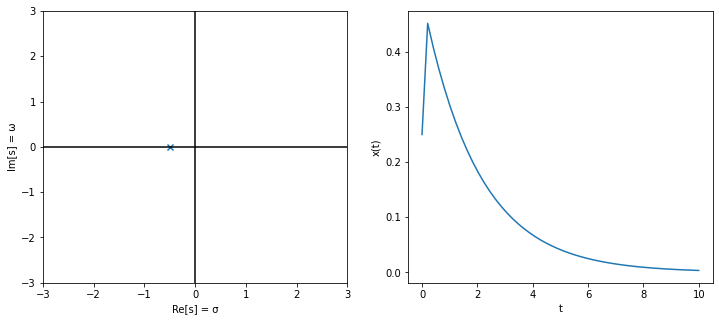

In [3]:
plot_poles([-0.5])

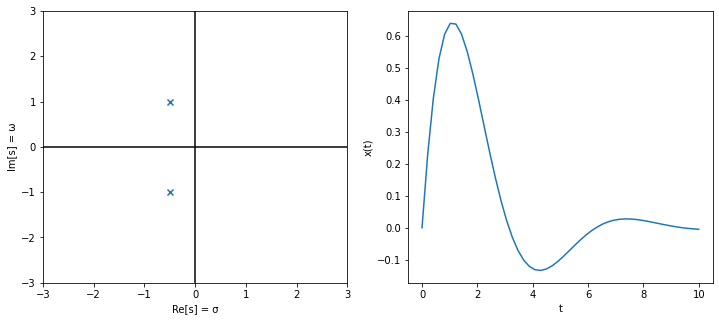

In [4]:
plot_poles([-0.5 + 1j, -0.5 - 1j])

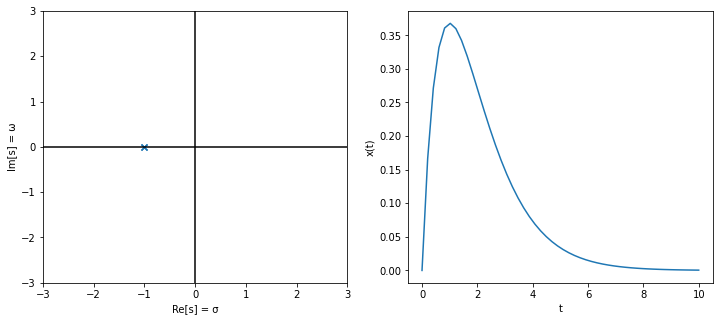

In [5]:
plot_poles([-1, -1])

#### Unstable

This happens when $Re[-p_i] > 0 \quad \exists i$.


In other words, some poles are on the right-half of the $s$-plane, and the result is that $\lim_{t \to \infty} |h(t)| = \infty$.

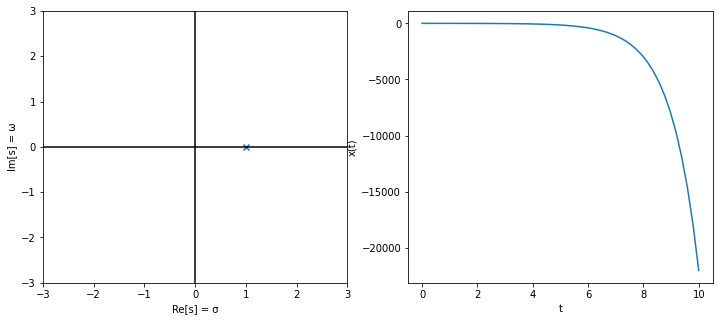

In [6]:
plot_poles([1])

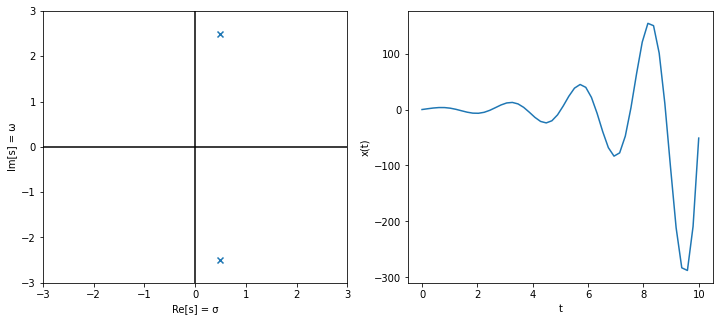

In [7]:
plot_poles([0.5 + 2.5j, 0.5 - 2.5j])

#### Marginally stable

This happens when $Re[-p_i] = 0 \quad \exists i$ and $Re[-p_i] > 0 \quad \not \exists i$.


In other words, some poles lie on the imaginary axis of the $s$-plane, but no poles are on the right-half of the $s$-plane, and the result is that $\lim_{t \to \infty} |h(t)| \neq \infty$ and $\lim_{t \to \infty} |h(t)| \neq 0$.

(NOTE: If the pole on the imaginary axis is repeated, then the system is unstable)

The below few plots are marginally stable.

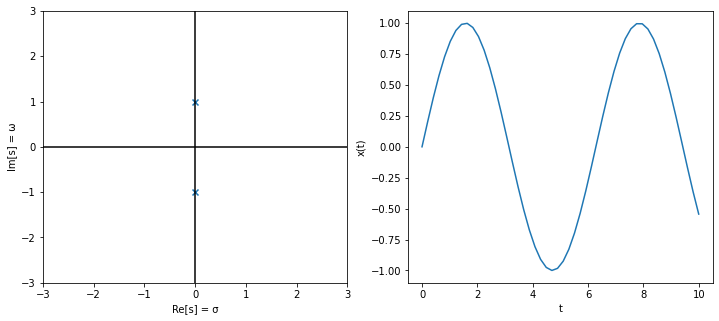

In [8]:
plot_poles([-1j, 1j])

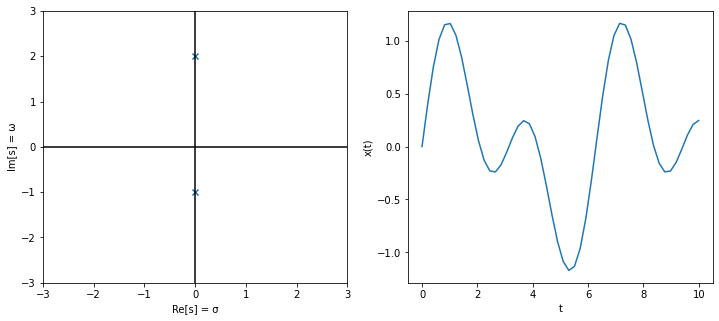

In [9]:
plot_poles([-1j, 2j])

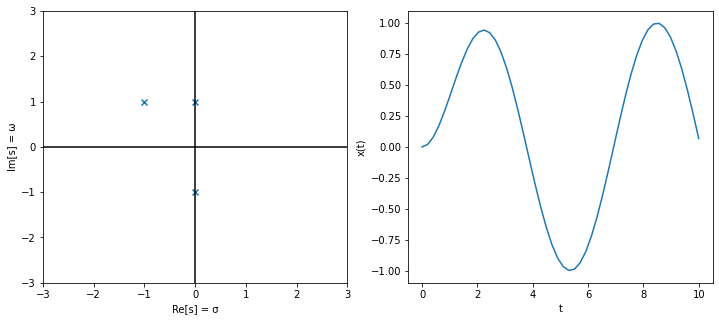

In [10]:
plot_poles([-1j, 1j, -1 + 1j])

However, once we have a single pole that is on the positive $s$-plane, it becomes unstable.

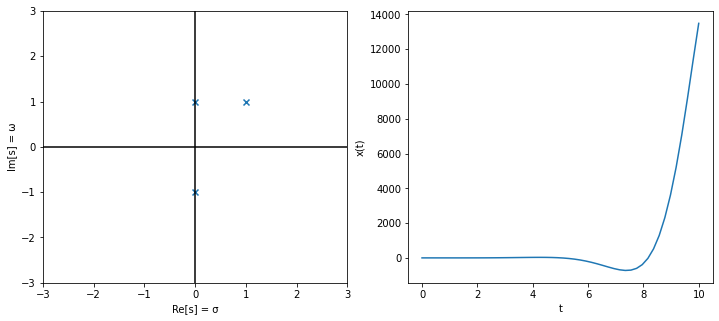

In [11]:
plot_poles([-1j, 1j, 1 + 1j])

It also happens if we repeat a pole on the imaginary axis.

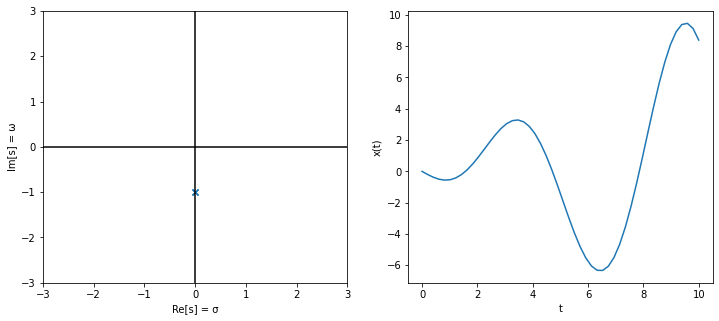

In [12]:
plot_poles([-1j, -1j])

## Bode diagram

A **Bode diagram** depicts the frequency response of the system.

It consist of:
* The magnitude plot of $|\tilde H(j \omega)|$ in dB
* The phase plot of $\angle \tilde H(j\omega)$ in degrees

The x-axes of the above plot is $\omega$, and is on a log scale.

By the [properties of real signals](./fourier_transform.ipynb#When-$x%28t%29$-is-real), we only plot the positive frequencies because we can derive the values for the negative frequencies.

Usually, we approximate the Body diagrams using straight-lines for ease of plotting, rather than computing the actual responses.
These plots are term the **straight-line Bode plots**.

### Construction

To construct a bode plot, we first rearrange the terms in the system into 1 of 3 systems:
Each system has the 
$$\frac{\prod_{i = 1} ^{M-l}\left ( \frac{s}{z_i} + 1\right)}
{\prod_{i = 1} ^{N}\left ( \frac{s}{p_i} + 1\right)}
$$
term, which is a system with unity DC gain.

#### Systems with $l$ differentiators

$$
\tilde H(s) = K' s^l \cdot \frac{\prod_{i = 1} ^{M-l}\left ( \frac{s}{z_i} + 1\right)}
{\prod_{i = 1} ^{N}\left ( \frac{s}{p_i} + 1\right)}
$$


The DC gain of the system is $H(0) = 0$.

#### Systems with $l$ integrators

$$
\tilde H(s) = \frac{K'}{s^l} \cdot \frac{\prod_{i = 1} ^{M-l}\left ( \frac{s}{z_i} + 1\right)}
{\prod_{i = 1} ^{N}\left ( \frac{s}{p_i} + 1\right)}
$$


The DC gain of the system is $H(0) = \infty$.

#### Systems with no integrators or differentiators

$$
\tilde H(s) = K' \cdot \frac{\prod_{i = 1} ^{M-l}\left ( \frac{s}{z_i} + 1\right)}
{\prod_{i = 1} ^{N}\left ( \frac{s}{p_i} + 1\right)}
$$


The DC gain of the system is $H(0) = K'$.

### Bode plots of basic systems


In [13]:
from numpy import log10

#### DC Gain
$$\tilde H(s) = K'$$

Magnitude response (dB): $ 20 \log _{10} K' $

Phase  response (degrees): $0$

In [14]:
def label_axis(ax, *labels, is_x=False):
    get_func = ax.get_xticklabels if is_x else ax.get_yticklabels
    set_func = ax.set_xticks if is_x else ax.set_yticks
    ticks = get_func()
    index = 0 if is_x else 1
    texts = (*(t.get_text() for t in ticks), *(l[1] for l in labels))
    locs = (*(t.get_position()[index] for t in ticks), *(l[0] for l in labels))
    set_func(locs, texts)
    ax.set_xlim(1e-2, 1e2)

In [15]:
Kp, L = 10, 1


def setup_axs():
    _, axs = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
    axs[0].set_ylim(-30, 30)
    axs[1].set_ylim(-180, 180)
    axs[1].set_yticks(range(-180, 181, 90))

    for ax in axs:
        ax.set_xlabel("frequency (rad/s)")
        ax.grid()
    return axs

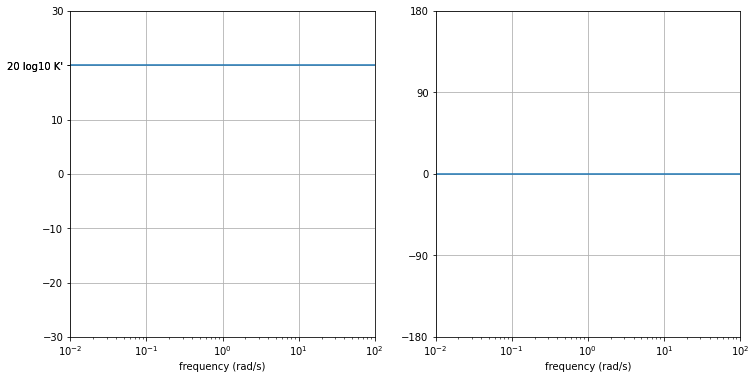

In [16]:
Kp = 10

axs = setup_axs()
axs[0].semilogx([1e-2, 1e2], [20 * log10(Kp), 20 * log10(Kp)])
axs[1].semilogx([1e-2, 1e2], [0, 0])
plt.draw()
label_axis(axs[0], (20 * log10(Kp), "20 log10 K'"))

#### $L$-differentiator
$$\tilde H(s) = K' s^L$$

Magnitude response (dB): $20 \log _{10} K' + 20 L \log_{10}(\omega)$

Phase  response (degrees): $90L$

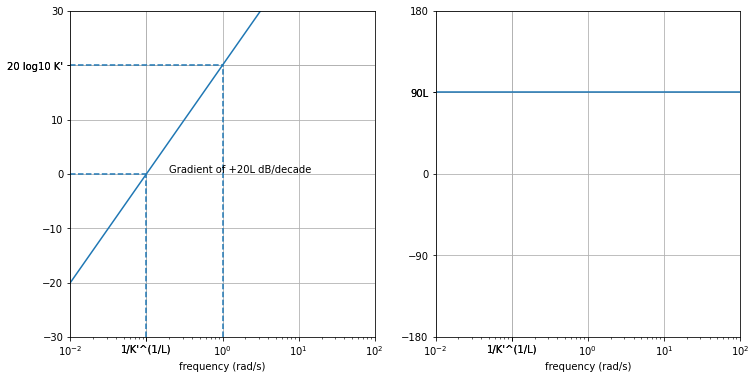

In [17]:
omegas = np.logspace(-2, 2)
Kp, L = 10, 1

axs = setup_axs()
axs[0].semilogx(omegas, 20 * log10(Kp) + 20 * L * log10(omegas))
axs[1].semilogx(omegas, np.ones(omegas.shape) * 90 * L)
plt.draw()
label_axis(axs[0], (1 / Kp ** (1 / L), "1/K'^(1/L)"), is_x=True)
label_axis(axs[0], (20 * log10(Kp), "20 log10 K'"))
label_axis(axs[1], (90 * L, "90L"))
axs[0].hlines(0, 1e-2, 1 / Kp ** (1 / L), linestyle="dashed")
axs[0].hlines(20 * log10(Kp), 1e-2, 1, linestyle="dashed")

axs[0].vlines(1 / Kp ** (1 / L), -30, -0, linestyle="dashed")
axs[0].vlines(1, -30, 20 * log10(Kp), linestyle="dashed")
axs[0].text(0.2, 0.2, "Gradient of +20L dB/decade")
plt.show()

#### $L$-integrator
$$\tilde H(s) = \frac{K'}{s^L}$$

Magnitude response (dB): $20 \log _{10} K' - 20 L \log_{10}(\omega)$

Phase  response (degrees): $-90L$

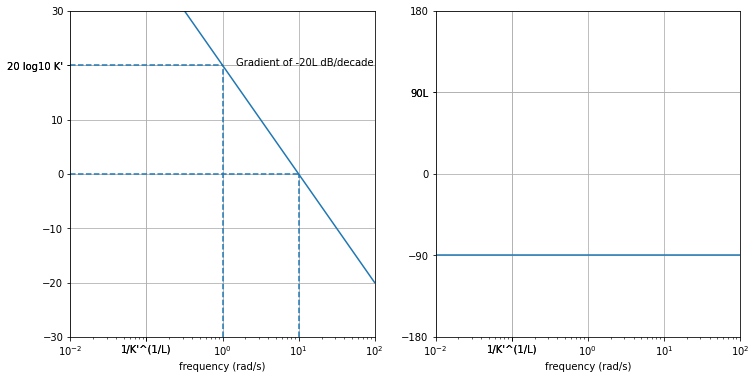

In [18]:
Kp, L = 10, 1

axs = setup_axs()
axs[0].semilogx(omegas, 20 * log10(Kp) - 20 * L * log10(omegas))
axs[1].semilogx(omegas, -np.ones(omegas.shape) * 90 * L)
plt.draw()
axs[0].hlines(0, 1e-2, Kp ** (1 / L), linestyle="dashed")
axs[0].hlines(20 * log10(Kp), 1e-2, 1, linestyle="dashed")

axs[0].vlines(Kp ** (1 / L), -30, -0, linestyle="dashed")
axs[0].vlines(1, -30, 20 * log10(Kp), linestyle="dashed")
axs[0].text(1.5, 20, "Gradient of -20L dB/decade")
label_axis(axs[0], (1 / Kp ** (1 / L), "1/K'^(1/L)"), is_x=True)
label_axis(axs[0], (20 * log10(Kp), "20 log10 K'"))
label_axis(axs[1], (90 * L, "90L"))
plt.show()

#### Zero factor (left-half s-plane)
$$\tilde H(s) = \frac{s}{z_i} + 1$$

Magnitude response (dB): $
20 \log_{10} \sqrt{\frac{\omega^2}{z_i^2} + 1}
\begin{align}\begin{cases}\to 0 &\quad \omega << z_i \\ \to 20 \log_{10} (\frac{\omega}{z_i}) &\quad \omega >> z_i\end{cases}\end{align}$

Phase  response (degrees): 
$
\arctan \left( \frac{\omega}{z_i} \right) 
\begin{align}\begin{cases}
\to 0 &\quad \omega \to 0\\ 
\to 90 &\quad \omega \to \infty\\
\end{cases}\end{align}$

We can approximate the above using a straight line at their asymptotes.

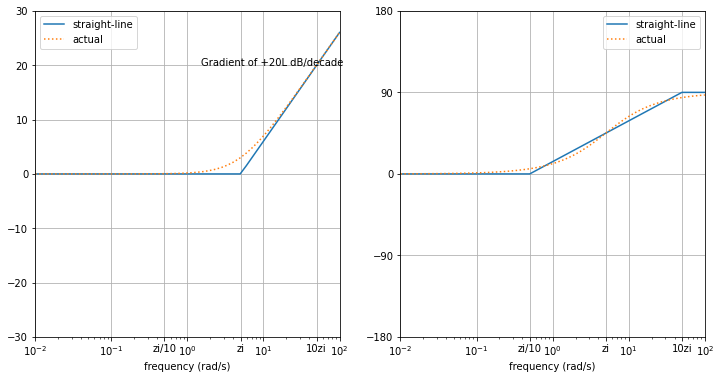

In [19]:
zi = 5

axs = setup_axs()
axs[0].semilogx(
    omegas, np.where(omegas < zi, 0, 20 * log10(omegas / zi)), label="straight-line"
)
axs[0].semilogx(
    omegas, 20 * log10(np.sqrt(omegas**2 / zi**2 + 1)), ":", label="actual"
)
axs[1].semilogx([1e-2, zi / 10, 10 * zi, 1e2], [0, 0, 90, 90], label="straight-line")
axs[1].semilogx(omegas, np.rad2deg(np.arctan(omegas / zi)), ":", label="actual")
axs[0].legend()
axs[1].legend()

plt.draw()
axs[0].text(1.5, 20, "Gradient of +20L dB/decade")
label_axis(axs[0], (zi / 10, "zi/10"), (zi, "zi"), (10 * zi, "10zi"), is_x=True)
axs[1].set_xlim(1e-2, 1e2)

plt.show()

#### Zero factor (right-half s-plane)
$$\tilde H(s) = \frac{-s}{z_i} + 1$$

Magnitude response (dB): $
20 \log_{10} \sqrt{\frac{\omega^2}{z_i^2} + 1}
\begin{align}\begin{cases}\to 0 &\quad \omega << z_i \\ \to 20 \log_{10} (\frac{\omega}{z_i}) &\quad \omega >> z_i\end{cases}\end{align}$

Phase  response (degrees): 
$
\arctan \left( -\frac{\omega}{z_i} \right) 
\begin{align}\begin{cases}
\to 0 &\quad \omega \to 0\\ 
\to -90 &\quad \omega \to \infty\\
\end{cases}\end{align}$

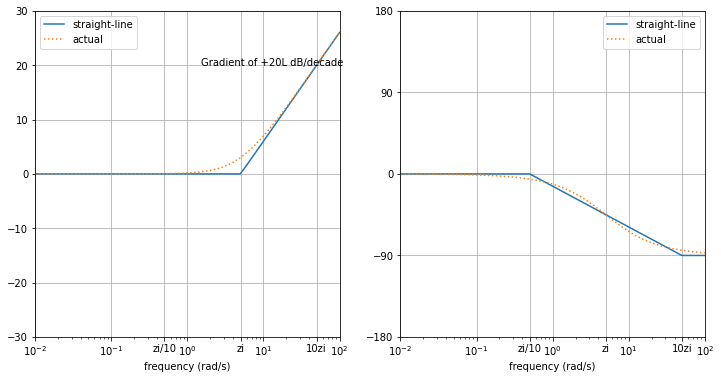

In [20]:
zi = 5

axs = setup_axs()
axs[0].semilogx(
    omegas, np.where(omegas < zi, 0, 20 * log10(omegas / zi)), label="straight-line"
)
axs[0].semilogx(
    omegas, 20 * log10(np.sqrt(omegas**2 / zi**2 + 1)), ":", label="actual"
)
axs[1].semilogx([1e-2, zi / 10, 10 * zi, 1e2], [0, 0, -90, -90], label="straight-line")
axs[1].semilogx(omegas, np.rad2deg(np.arctan(-omegas / zi)), ":", label="actual")
axs[0].legend()
axs[1].legend()

plt.draw()
axs[0].text(1.5, 20, "Gradient of +20L dB/decade")
label_axis(axs[0], (zi / 10, "zi/10"), (zi, "zi"), (10 * zi, "10zi"), is_x=True)
axs[1].set_xlim(1e-2, 1e2)

plt.show()

#### Pole factor
$$\tilde H(s) = \frac{1}{\frac{s}{p_i} + 1}$$

Magnitude response (dB): $
-20 \log_{10} \sqrt{\frac{\omega^2}{p_i^2} + 1}
\begin{align}\begin{cases}\to 0 &\quad \omega << p_i \\ \to -20 \log_{10} (\frac{\omega}{z_i}) &\quad \omega >> p_i\end{cases}\end{align}$

Phase  response (degrees): 
$
-\arctan \left( \frac{\omega}{p_i} \right) 
\begin{align}\begin{cases}
\to 0 &\quad \omega \to 0\\ 
\to -90 &\quad \omega \to \infty\\
\end{cases}\end{align}$

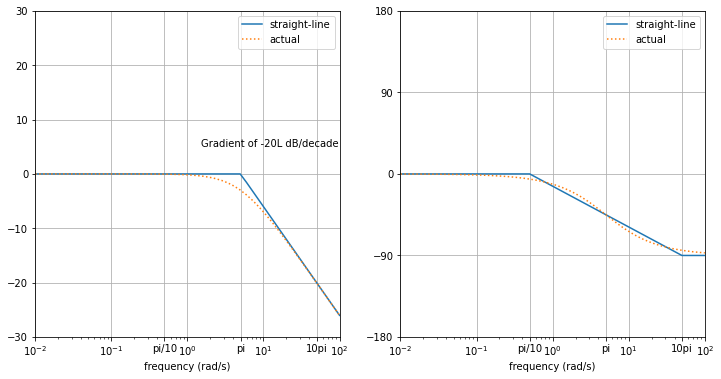

In [21]:
pi = 5

axs = setup_axs()
axs[0].semilogx(
    omegas, np.where(omegas < pi, 0, -20 * log10(omegas / pi)), label="straight-line"
)
axs[0].semilogx(
    omegas, -20 * log10(np.sqrt(omegas**2 / pi**2 + 1)), ":", label="actual"
)
axs[1].semilogx([1e-2, pi / 10, 10 * pi, 1e2], [0, 0, -90, -90], label="straight-line")
axs[1].semilogx(omegas, np.rad2deg(-np.arctan(omegas / pi)), ":", label="actual")
axs[0].legend()
axs[1].legend()

plt.draw()
axs[0].text(1.5, 5, "Gradient of -20L dB/decade")
label_axis(axs[0], (pi / 10, "pi/10"), (pi, "pi"), (10 * pi, "10pi"), is_x=True)
axs[1].set_xlim(1e-2, 1e2)

plt.show()

#### Underdamped 2-nd order factor
$$\tilde H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_ns + \omega_n ^2} = \frac{1}{(\frac{s}{p_1} + 1)(\frac{s}{p_2} + 1)}$$

$\zeta$ is the **damping ratio** and $\omega_n$ is the **underdamped natural frequency**.

##### $\zeta >1$
System is **overdamped**.

$p_1, p_2$ are real and distinct

Create the plot by combing the plot of two distinct pole factors.

##### $\zeta =1$
System is **critically damped**.

$p_1= p_2 = \omega_n$

Create the plot by combining the plot of repeated pole factors.

##### $ 0 < \zeta <1$
System is **underdamped**.

$p_1,p_2$ are complex conjugate pairs

Plot same as $\zeta = 1$.

##### $ \zeta =0$
System is **undamped**.

$p_1 = j \omega _n = -p_2$

Plot same as $\zeta = 1$.

### Putting it together

Now that we can find the Bode plots of basic systems, we can proceed to find the Bode plot of our system in question.

1. Rearrange the frequency response into a product of that of the basic systems.
2. Find the Bode plots of the basic systems
3. Add up the magnitude and phase plots of the Bode plot to obtain the desired Body plot

This works because phases are added together when the transfer functions are multiplied together.
On the other hand, the magnitudes are multiplied, but this corresponds to an addition of dB gains.
$$
20 \log _{10}{AB} = 
20 \log _{10}{A} + 
20 \log _{10}{B}  
$$

Thus, obtaining the desired Bode plot is rather easy to do by hand.

## Resonance in second order systems


Given a second order system:
$$\tilde H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_ns + \omega_n ^2}$$

The magnitude response will have a "hump" around $\omega=\omega_n$ which is larger when $\zeta$ is small and disappears once $\zeta$ is above some value.

The magnitude of the "hump" is called **resonance peak** and the frequency at which this occurs is called the **resonance frequency**.

Resonance frequency: $\omega_r = \omega_n \sqrt{1 - 2\zeta ^2}$

Resonance peak: $M_r = \frac{K}{2\zeta \sqrt{1-\zeta^2}}$

## Asymptotic behaviour of straight-line Bode plots

Since there are only a set number of basic systems, we can derive the asymptotic behaviour of our system just by counting a few characteristics of our system.

* $N$: number of poles
* $M$: number of zeroes
* $M^+$ number of zeroes in right-half $s$-plane
* $M^-$ number of zeroes in left-half $s$-plane
    * $M = M^+ + M^-$
* $D$: number of differentiators
* $I$: number of integrators

### Slope of magnitude

#### Low frequency

$$ (D - I) \times 20 \text{ dB/decade}$$

#### High frequency

$$ (M - N) \times 20 \text{ dB/decade}$$

### Phase 

#### Low frequency

$$ (D - I) \times 90 ^{\circ}$$

#### High frequency

$$ (M^- - M^+ - N) \times 90^\circ$$